## Modelo Predictivo para calcular precio de vivienda usada en Bogotá
 El precio de venta de una vivienda puede variar por muchos factores entre ellos el tamaño, la ubicación, el número de habitaciones, el estado de la casa, antigüedad, reformas, etc.
 
 - El objetivo principal de este proyecto es construir un modelo ML para predecir el precio de una vivienda ubicada en la ciudad de Bogotá.
 

Este dataset es tomado para fines educativos de:
- Título del dataset: Bogota Housing Prices
- URL del dataset: [Bogotá Housing Prices - Kaggle](https://www.kaggle.com/datasets/eliasbuitragob/bogota-housing-prices)
- Autor o creador del dataset: Elias Buitrago B.
- Fecha de publicación: N/A
- Licencia: Desconocida (Consultar los términos de uso en la página de Kaggle)

Para dar solución a este proyecto, lo dividiremos en 5 grandes pilares:
1) Exploración de los datos
2) Limpieza de los datos
3) Visualización
4) Preprocesamiento de los datos
5) Modelo ML

In [1]:
# Importamos las librerías

import numpy as np
import pandas as pd

# Librerías para visualizar
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones

from scipy.stats import skew, kurtosis # estadisticas para coef asimetria, coef kurtosis

from sklearn import metrics # metricas
from sklearn.preprocessing import LabelEncoder # comvertir variables categoricas en formato para maquina
from sklearn.ensemble import RandomForestRegressor # modelo de bosques aleatorios
from sklearn.model_selection import train_test_split # separar datos de entrenamiento y de test

### 1) Exploración de datos:
En esta instancia vamos a explorar todos los datos para conocer el tipo de data que vamos a manipular, iniciamos con la carga de los datos:

In [7]:
data = pd.read_csv('housing_fincaraiz.csv', sep = ';')
display(data)


,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,administracion,precio_m2,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,nombre,ubicacion,precio
0,2,2,1,92 m²,92 m²,4,No definida,9 a 15 años,$ 622.000 COP,"$ 6.521.739,13*m²",...,0,1,0,0,0,0,0,Apartamento,Centro Internacional,600000000
1,1,2,1,56 m²,56 m²,6,No definida,1 a 8 años,$ 523.000 COP,"$ 8.392.857,14*m²",...,0,1,0,0,0,0,0,Apartamento,Calleja Baja,470000000
2,3,4,2,144 m²,144 m²,6,No definida,16 a 30 años,$ 620.000 COP,"$ 6.597.222,22*m²",...,0,0,0,0,0,0,0,Apartamento,Cerros de Suba,950000000
3,1,1,0,31 m²,31 m²,4,Excelente,menor a 1 año,$ 130.000 COP,"$ 7.419.354,84*m²",...,0,0,0,0,0,0,0,Apartamento,Mazuren,230000000
4,3,2,1,52 m²,52 m²,4,No definida,1 a 8 años,$ 219.000 COP,"$ 5.576.923,08*m²",...,0,0,0,0,0,0,0,Apartamento,El plan,290000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,3,2,2,183 m²,183 m²,6,Bueno,16 a 30 años,$ 1.404.000 COP,"$ 5.409.836,07*m²",...,1,0,1,0,1,0,1,Apartamento,Lindaraja,990000000
8424,2,2,1,58 m²,0 m²,4,Bueno,9 a 15 años,$ 320.000 COP,"$ 5.517.241,38*m²",...,0,0,0,0,0,0,1,Apartamento,Caobos salazar,320000000
8425,4,4,2,170 m²,0 m²,4,No definida,más de 30 años,$ 500.000 COP,"$ 4.029.411,76*m²",...,1,0,0,0,0,0,0,Casa,Cedritos,685000000
8426,3,1,0,47 m²,47 m²,2,No definida,No definida,$ 60.000 COP,"$ 2.617.021,28*m²",...,1,0,1,0,0,0,0,Apartamento,Bosa,123000000


Obteniendo información de las columnas y el tipo de data que presenta nuestra data:

In [8]:
data.info() # información de las columnas según python

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   habitaciones            8428 non-null   object
 1   baños                   8428 non-null   object
 2   parqueaderos            8428 non-null   object
 3   area_construida         8428 non-null   object
 4   area_privada            8428 non-null   object
 5   estrato                 8428 non-null   int64 
 6   estado                  8428 non-null   object
 7   antiguedad              8428 non-null   object
 8   administracion          8428 non-null   object
 9   precio_m2               8428 non-null   object
 10  Ascensor                8428 non-null   int64 
 11  Circuito cerrado de TV  8428 non-null   int64 
 12  Parqueadero Visitantes  8428 non-null   int64 
 13  Portería / Recepción    8428 non-null   int64 
 14  Zonas Verdes            8428 non-null   int64 
 15  Saló

Análisis de la información entregada por Python, se observa que algunas columnas tienen valores numéricos como lo son las columnas: habitaciones, baños y parqueaderos, pero Python las toma como 'object' y seguramente presentan algún valor 'string' y si análizamos la data vemos un valor como 'No definida' en algunos datos haciendo referencia a datos nulos. Establecemos el tipo de dato de estas columnas, empezando con las columnas: habitaciones, baños y parqueaderos.

In [9]:
#Esta función convierte las columnas a tipo numerico y los valores string como NaN
def tipo_num(df, columnas):
    for columna in columnas:
        
        # Convertir los datos de la columna a tipo numérico
        df[columna] = pd.to_numeric(df[columna], errors='coerce') # entrega datos float y 'errors' devuelve nan por datos no númericos
# Columnas a tratar como númericas}
datos_cuanti = ['habitaciones', 'baños', 'parqueaderos'] 

tipo_num(data, datos_cuanti)

display(data.head(1))

,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,administracion,precio_m2,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,nombre,ubicacion,precio
0,2.0,2.0,1.0,92 m²,92 m²,4,No definida,9 a 15 años,$ 622.000 COP,"$ 6.521.739,13*m²",...,0,1,0,0,0,0,0,Apartamento,Centro Internacional,600000000


In [10]:
# establezco la variable estrato como str para que sean tratados como datos cualitativos
data['estrato'] = data['estrato'].astype(str)

visualicemos ahora las columnas correspondientes a: area_construida, area_privada, administracion, precio_m2 y precio(variable a predecir). Las cuales, según Python son del tipo 'object'. Veamos la razón:

In [11]:
data.head(2)

,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,administracion,precio_m2,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,nombre,ubicacion,precio
0,2.0,2.0,1.0,92 m²,92 m²,4,No definida,9 a 15 años,$ 622.000 COP,"$ 6.521.739,13*m²",...,0,1,0,0,0,0,0,Apartamento,Centro Internacional,600000000
1,1.0,2.0,1.0,56 m²,56 m²,6,No definida,1 a 8 años,$ 523.000 COP,"$ 8.392.857,14*m²",...,0,1,0,0,0,0,0,Apartamento,Calleja Baja,470000000


Se observa la **razón** por la cual son consideradas 'object' debido a que sus datos númericos están acompañados de otros tipos de datos no númericos. Separemos la parte númerica de los datos en las columnas: area_construida, area_privada, administracion, precio_m2. Se tiene: 

In [12]:
sep_datos = ['area_construida', 'area_privada', 'administracion', 'precio_m2', 'precio']

# Como utilizaremos REGEX, garanticemos que los datos en las columnas son tipo str
for col in sep_datos:
    data[col] = data[col].astype(str)


# eliminar texto no numérico
for col in sep_datos:
    # Eliminamos lo que sea diferente a dígitos o comas
    data[col] = data[col].str.replace(r'[^\d,]', '', regex=True)
    # Reemplazar comas por puntos para asegurar un formato de número válido
    data[col] = data[col].str.replace(',', '.', regex=True)

    # Convertir valores vacíos a NaN
    data[col] = data[col].replace('', np.nan)
    # Convertir a tipo numérico
    data[col] = pd.to_numeric(data[col], errors='coerce') # datos no númericos, retorna NaN

    
# Verificar el DataFrame resultante
display(data.head())
data.info()

,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,administracion,precio_m2,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,nombre,ubicacion,precio
0,2.0,2.0,1.0,92.0,92.0,4,No definida,9 a 15 años,622000.0,6521739.13,...,0,1,0,0,0,0,0,Apartamento,Centro Internacional,600000000.0
1,1.0,2.0,1.0,56.0,56.0,6,No definida,1 a 8 años,523000.0,8392857.14,...,0,1,0,0,0,0,0,Apartamento,Calleja Baja,470000000.0
2,3.0,4.0,2.0,144.0,144.0,6,No definida,16 a 30 años,620000.0,6597222.22,...,0,0,0,0,0,0,0,Apartamento,Cerros de Suba,950000000.0
3,1.0,1.0,0.0,31.0,31.0,4,Excelente,menor a 1 año,130000.0,7419354.84,...,0,0,0,0,0,0,0,Apartamento,Mazuren,230000000.0
4,3.0,2.0,1.0,52.0,52.0,4,No definida,1 a 8 años,219000.0,5576923.08,...,0,0,0,0,0,0,0,Apartamento,El plan,290000000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   habitaciones            8396 non-null   float64
 1   baños                   8414 non-null   float64
 2   parqueaderos            8427 non-null   float64
 3   area_construida         8428 non-null   float64
 4   area_privada            8428 non-null   float64
 5   estrato                 8428 non-null   object 
 6   estado                  8428 non-null   object 
 7   antiguedad              8428 non-null   object 
 8   administracion          6592 non-null   float64
 9   precio_m2               8428 non-null   float64
 10  Ascensor                8428 non-null   int64  
 11  Circuito cerrado de TV  8428 non-null   int64  
 12  Parqueadero Visitantes  8428 non-null   int64  
 13  Portería / Recepción    8428 non-null   int64  
 14  Zonas Verdes            8428 non-null   

Apreciamos, las columnas desde la 10 hasta la 27 son variables de tipo Bool(1 == 'Si', 0 == 'No'). Tenemos:

In [13]:
# Convertir las columnas de la 10 a la 27 en 'Si' y 'No'
for col in data.columns[10:28]:  # Columnas de la 10 a la 27
    data[col] = data[col].map({1: 'Sí', 0: 'No'})
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   habitaciones            8396 non-null   float64
 1   baños                   8414 non-null   float64
 2   parqueaderos            8427 non-null   float64
 3   area_construida         8428 non-null   float64
 4   area_privada            8428 non-null   float64
 5   estrato                 8428 non-null   object 
 6   estado                  8428 non-null   object 
 7   antiguedad              8428 non-null   object 
 8   administracion          6592 non-null   float64
 9   precio_m2               8428 non-null   float64
 10  Ascensor                8428 non-null   object 
 11  Circuito cerrado de TV  8428 non-null   object 
 12  Parqueadero Visitantes  8428 non-null   object 
 13  Portería / Recepción    8428 non-null   object 
 14  Zonas Verdes            8428 non-null   

In [14]:
data.head(2)


,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,administracion,precio_m2,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,nombre,ubicacion,precio
0,2.0,2.0,1.0,92.0,92.0,4,No definida,9 a 15 años,622000.0,6521739.13,...,No,Sí,No,No,No,No,No,Apartamento,Centro Internacional,600000000.0
1,1.0,2.0,1.0,56.0,56.0,6,No definida,1 a 8 años,523000.0,8392857.14,...,No,Sí,No,No,No,No,No,Apartamento,Calleja Baja,470000000.0


Conociendo esta información, procedemos a construir nuestra propia tabla que nos suministre descripción y la verdadera clasificación de las variables para cada columna.

## Tipo de variables
| Columna | Descripción | Tipo | Rango/Nº. Categorías |
|:-----:|:-----:|:-----:|:-----:|
| habitaciones | N° de habitaciones | Cuantitativa discreta | Rango: [1-16] |
| baños | N° de baños | Cuantitativa discreta | Rango: [1-16] |
| parqueaderos | N° de baños | Cuantitativa discreta | Rango: [0-10] |
| area_construida| Superficie total de la vivienda | Cuantitativa continua | Rango: [1-139000] m2 |
| area_privada | Superficie obtenida al medir el interior de la vivienda | Cuantitativa continua | Rango: [0-139000] m2 |
| estrato | Estrato de la vivienda | Cualitativa ordinal | Categorías: 7(0,1,2,3,4,5,6) |
| estado | Estado actual de la casa | Cualitativa ordinal | Categorías: 4('Excelente', 'Bueno', 'Remodelado', 'No definida') |
| antiguedad | Antigüedad de la vivienda desde su construcción | Cualitativa ordina | Categorías: 6('menor a 1 año','1 a 8 años','9 a 15 años','16 a 30 años','más de 30 años','No definida') |
| administracion | Costos de administración | Cuantitativa continua | Rango: [1 - 1550000] COP |
| precio_m2 | Precio de venta del m2 | Cuantitativa continua | Rango: [3.444,4 - 8.166.666.666,7]COP |
| Ascensor | Tiene ascensero la vivienda | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Circuito cerrado de TV | Tiene tele vigilancia | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Parqueadero Visitantes | Cuenta con parqueadero para visitantes | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Portería / Recepción | Cuenta con portería o recepción | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Zonas Verdes | Tiene zonas verdes | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Salón Comunal | Tiene salón comunal | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Balcón | Cuenta con balcón la vivienda | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Barra estilo americano | Estilo de barra en la cocina | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Calentador | Tiene calentador de agua | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Chimenea | Tiene chimenea | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Citófono | Tiene citófono | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Cocina Integral | Cuenta con cocina integral | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Terraza | Tiene terraza | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Vigilancia | Cuenta con servicio de vigilancia la vivienda | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Parques cercanos | Tiene acceso a parques cercanos | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Estudio | Cuenta con area tipo 'estudio' | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Patio | Tiene zona de patio | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| Depósito / Bodega | Cuenta con bodega o depósito | Cualitativa nominal | Categorías: 2(1 = Si, 0 = No) |
| nombre | Tipo de vivienda | Cualitativa nominal | Categorías: 2(Apartamento, Casa) |
| ubicacion | Sitio donde se encuentra ubicada la vivienda | Cualitativa nominal | Categorías: 6362 datos distintos |
| precio | Valor total del inmueble | Cuantitativa continua | Rango: [2,45 - 865.000.000]COP |

Definida nuestra tabla, procedemos a preparar los datos.

### 2)Limpieza y preparación de los datos

Antes de analizar y visualizar los datos, debemos preparar la data, teniendo en cuenta todo lo realizado anteriormente en algunas variables donde se extrajo sus unidades de medida, así mismo verificar si existen datos duplicados o datos nulos que puedan entorpecer nuestro modelo.

In [15]:
# Verifiquemos la presencia de datos duplicados
d_duplicados = data.duplicated().any() # Existe almenos un valor duplicado
datos_duplicados = data.duplicated().sum() # cantidad de datos duplicados
print(f"¿Existen datos duplicados en la data? -> {d_duplicados}")
print(f"¿Cuantas filas duplicadas hay? -> {datos_duplicados}")

¿Existen datos duplicados en la data? -> True
¿Cuantas filas duplicadas hay? -> 2037


In [16]:
# Eliminar filas duplicadas
data = data.drop_duplicates()
print(f"Data sin duplicados -> {len(data)}")
data

Data sin duplicados -> 6391


,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,administracion,precio_m2,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,nombre,ubicacion,precio
0,2.0,2.0,1.0,92.0,92.0,4,No definida,9 a 15 años,622000.0,6521739.13,...,No,Sí,No,No,No,No,No,Apartamento,Centro Internacional,600000000.0
1,1.0,2.0,1.0,56.0,56.0,6,No definida,1 a 8 años,523000.0,8392857.14,...,No,Sí,No,No,No,No,No,Apartamento,Calleja Baja,470000000.0
2,3.0,4.0,2.0,144.0,144.0,6,No definida,16 a 30 años,620000.0,6597222.22,...,No,No,No,No,No,No,No,Apartamento,Cerros de Suba,950000000.0
3,1.0,1.0,0.0,31.0,31.0,4,Excelente,menor a 1 año,130000.0,7419354.84,...,No,No,No,No,No,No,No,Apartamento,Mazuren,230000000.0
4,3.0,2.0,1.0,52.0,52.0,4,No definida,1 a 8 años,219000.0,5576923.08,...,No,No,No,No,No,No,No,Apartamento,El plan,290000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,3.0,4.0,2.0,158.0,157.0,6,No definida,16 a 30 años,800000.0,4430379.75,...,No,No,No,No,No,No,No,Apartamento,Santa Barbara central,700000000.0
8417,3.0,2.0,1.0,88.0,84.0,4,No definida,1 a 8 años,290000.0,4488636.36,...,Sí,No,Sí,No,No,No,No,Apartamento,Pinar de Suba,395000000.0
8419,1.0,1.0,0.0,45.0,45.0,4,No definida,16 a 30 años,329000.0,4244444.44,...,Sí,No,No,No,No,No,No,Apartamento,LA VICTORIA NORTE,191000000.0
8425,4.0,4.0,2.0,170.0,0.0,4,No definida,más de 30 años,500000.0,4029411.76,...,Sí,No,No,No,No,No,No,Casa,Cedritos,685000000.0


Procedamos a buscar datos nulos, tengamos en cuenta que la existencia de datos NaN nos exigiría un mayor análisis a la hora de decidir cómo tratarlos.

In [17]:
data.isnull().sum()

habitaciones                25
baños                       12
parqueaderos                 1
area_construida              0
area_privada                 0
estrato                      0
estado                       0
antiguedad                   0
administracion            1398
precio_m2                    0
Ascensor                     0
Circuito cerrado de TV       0
Parqueadero Visitantes       0
Portería / Recepción         0
Zonas Verdes                 0
Salón Comunal                0
Balcón                       0
Barra estilo americano       0
Calentador                   0
Chimenea                     0
Citófono                     0
Cocina Integral              0
Terraza                      0
Vigilancia                   0
Parques cercanos             0
Estudio                      0
Patio                        0
Depósito / Bodega            0
nombre                       0
ubicacion                    0
precio                       0
dtype: int64

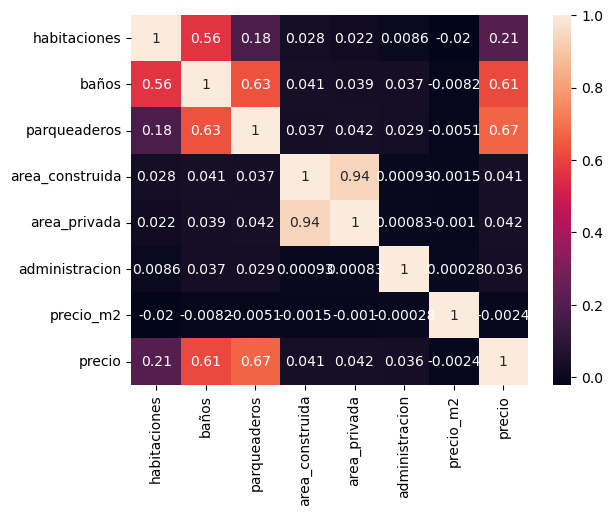

In [18]:
"""Visualicemos la correlación que presentan nuestros datos para tener una idea de cómo tratarlos,
luego de visualizar su comportamiento."""

sns.heatmap(data.select_dtypes(include = 'number').corr(), annot = True)
plt.show()

Apreciamos que las columnas: habitaciones, baños y parqueaderos presentan datos nulos relativamente bajos que podríamos descartalos, pero en la columna 'administracion' la cantidad de datos nulos es significativa como para considerar eliminar los datos sin tener en cuenta el comportamiento de los datos.

In [19]:
# descartemos los valores nulos para estas columnas
data = data.dropna(subset=['habitaciones', 'baños', 'parqueaderos'])
data.isnull().sum()

habitaciones                 0
baños                        0
parqueaderos                 0
area_construida              0
area_privada                 0
estrato                      0
estado                       0
antiguedad                   0
administracion            1375
precio_m2                    0
Ascensor                     0
Circuito cerrado de TV       0
Parqueadero Visitantes       0
Portería / Recepción         0
Zonas Verdes                 0
Salón Comunal                0
Balcón                       0
Barra estilo americano       0
Calentador                   0
Chimenea                     0
Citófono                     0
Cocina Integral              0
Terraza                      0
Vigilancia                   0
Parques cercanos             0
Estudio                      0
Patio                        0
Depósito / Bodega            0
nombre                       0
ubicacion                    0
precio                       0
dtype: int64

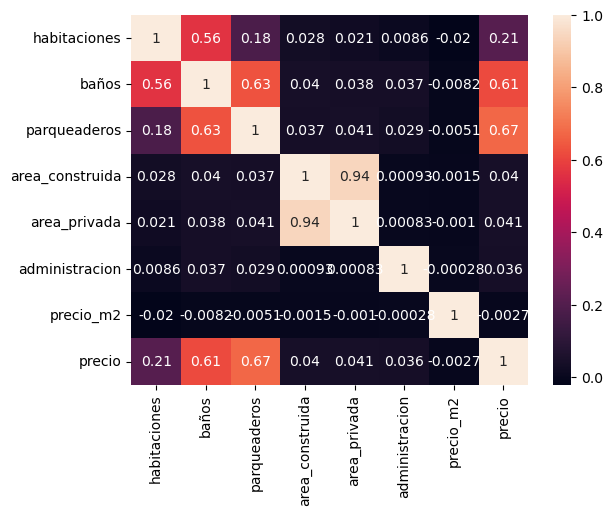

In [20]:
# Apreciemos como afecto la correlación de los datos
sns.heatmap(data.select_dtypes(include = 'number').corr(), annot = True)
plt.show()

Al ser una cantidad baja de datos nulos, podemos apreciar que no afectó de manera significativa la correlación de nuestros datos. Para la variable administración debemos dar un análisis profundo, ya que tenemos una cantidad significativa de datos nulos y estos podrían reflejarse en el error absoluto medio de nuestro modelo. Realicemos un análisis descriptivo completo a esta columna para tomar la mejor decisión a la hora de imputar estos datos.

In [21]:
data['administracion'].describe()

count    4.987000e+03
mean     2.124797e+06
std      3.723202e+07
min      1.000000e+00
25%      2.230000e+05
50%      4.090000e+05
75%      7.545000e+05
max      1.490000e+09
Name: administracion, dtype: float64

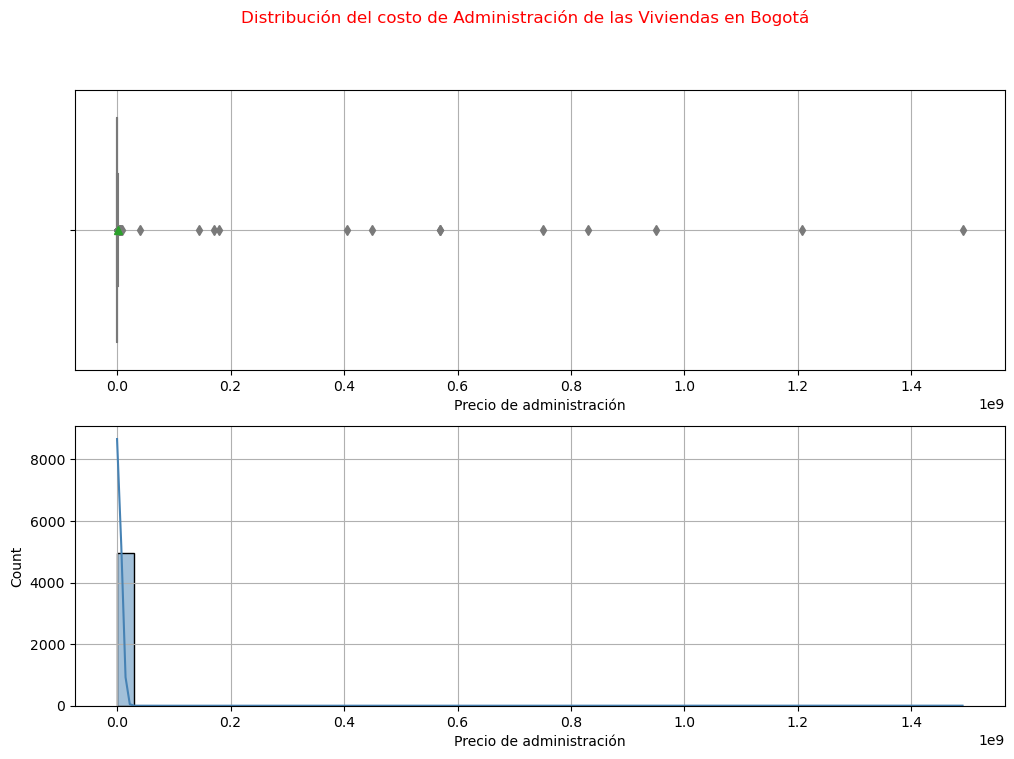

In [22]:
# Crea una figura y un conjunto de subgráficos con 2 filas y 1 columnas
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Titulo general
fig.suptitle('Distribución del costo de Administración de las Viviendas en Bogotá', color='r')

# Primer imagen
sns.boxplot(x=data['administracion'], ax = axes[0],color="lightblue",showmeans=True) ## crea el boxplot
axes[0].set_xlabel('Precio de administración')
axes[0].grid()
# Segunda imagen
sns.histplot(x=data['administracion'],kde=True,color="steelblue", ax=axes[1], bins = 50)
axes[1].set_xlabel('Precio de administración')
axes[1].grid()


plt.show()  

**Conclusión:** De la tabla obtenida y en apoyo de los gráficos, podemos apreciar que los datos suministrados por la variable 'administración' presentan una cantidad significativa de datos atípicos. Además, la distribución es relativamente asimetrica, sesgada hacia la derecha y con una variabilidad alta de sus datos.

**Nota:** Los datos NaN de la columna administración equivalen al 20% aproximadamente de toda la data, por lo que no resulta prudente eliminar dichos datos. Por otro lado, si procedemos a imputar los datos con la media debido a la alta cantidad de datos extremos (atípicos), podríamos introducir un sesgo mayor, por ende emplearemos la imputación mediante la mediana, la cual es más robusta frente a la alta frecuencia de datos extremos. Lo anterior lo tendremos en cuenta a la hora de diseñar nuestro modelo.

Antes de visualizar la data, procedemos a asignar los nombres a nuestras columnas teniendo en cuenta las unidades de medidas que hemos extraído anteriormente.

In [23]:
data = data.rename(columns={'area_construida':'area_construida_m2'})
data = data.rename(columns={'area_privada':'area_privada_m2'})
data = data.rename(columns={'precio_m2':'precio_m2_COP'})
data = data.rename(columns={'precio':'precio_COP'})
data = data.rename(columns={'nombre':'Tipo_de_Vivienda'})
data

,habitaciones,baños,parqueaderos,area_construida_m2,area_privada_m2,estrato,estado,antiguedad,administracion,precio_m2_COP,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,Tipo_de_Vivienda,ubicacion,precio_COP
0,2.0,2.0,1.0,92.0,92.0,4,No definida,9 a 15 años,622000.0,6521739.13,...,No,Sí,No,No,No,No,No,Apartamento,Centro Internacional,600000000.0
1,1.0,2.0,1.0,56.0,56.0,6,No definida,1 a 8 años,523000.0,8392857.14,...,No,Sí,No,No,No,No,No,Apartamento,Calleja Baja,470000000.0
2,3.0,4.0,2.0,144.0,144.0,6,No definida,16 a 30 años,620000.0,6597222.22,...,No,No,No,No,No,No,No,Apartamento,Cerros de Suba,950000000.0
3,1.0,1.0,0.0,31.0,31.0,4,Excelente,menor a 1 año,130000.0,7419354.84,...,No,No,No,No,No,No,No,Apartamento,Mazuren,230000000.0
4,3.0,2.0,1.0,52.0,52.0,4,No definida,1 a 8 años,219000.0,5576923.08,...,No,No,No,No,No,No,No,Apartamento,El plan,290000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,3.0,4.0,2.0,158.0,157.0,6,No definida,16 a 30 años,800000.0,4430379.75,...,No,No,No,No,No,No,No,Apartamento,Santa Barbara central,700000000.0
8417,3.0,2.0,1.0,88.0,84.0,4,No definida,1 a 8 años,290000.0,4488636.36,...,Sí,No,Sí,No,No,No,No,Apartamento,Pinar de Suba,395000000.0
8419,1.0,1.0,0.0,45.0,45.0,4,No definida,16 a 30 años,329000.0,4244444.44,...,Sí,No,No,No,No,No,No,Apartamento,LA VICTORIA NORTE,191000000.0
8425,4.0,4.0,2.0,170.0,0.0,4,No definida,más de 30 años,500000.0,4029411.76,...,Sí,No,No,No,No,No,No,Casa,Cedritos,685000000.0


Procedemos a establecer el orden de nuestras variables ordinales:

In [24]:
## A las variables ordinales debemos fijarles el orden
data['estrato'] = pd.Categorical(data['estrato'],
                              categories=['0','1','2','3','4','5','6'],
                              ordered=True)
data['estado'] = pd.Categorical(data['estado'],
                              categories=['Remodelado', 'Bueno', 'Excelente','No definida'],
                              ordered=True)
data['antiguedad'] = pd.Categorical(data['antiguedad'],
                              categories=['menor a 1 año','1 a 8 años','9 a 15 años',
                                         '16 a 30 años','más de 30 años','No definida'],
                              ordered=True)
data.head()

,habitaciones,baños,parqueaderos,area_construida_m2,area_privada_m2,estrato,estado,antiguedad,administracion,precio_m2_COP,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,Tipo_de_Vivienda,ubicacion,precio_COP
0,2.0,2.0,1.0,92.0,92.0,4,No definida,9 a 15 años,622000.0,6521739.13,...,No,Sí,No,No,No,No,No,Apartamento,Centro Internacional,600000000.0
1,1.0,2.0,1.0,56.0,56.0,6,No definida,1 a 8 años,523000.0,8392857.14,...,No,Sí,No,No,No,No,No,Apartamento,Calleja Baja,470000000.0
2,3.0,4.0,2.0,144.0,144.0,6,No definida,16 a 30 años,620000.0,6597222.22,...,No,No,No,No,No,No,No,Apartamento,Cerros de Suba,950000000.0
3,1.0,1.0,0.0,31.0,31.0,4,Excelente,menor a 1 año,130000.0,7419354.84,...,No,No,No,No,No,No,No,Apartamento,Mazuren,230000000.0
4,3.0,2.0,1.0,52.0,52.0,4,No definida,1 a 8 años,219000.0,5576923.08,...,No,No,No,No,No,No,No,Apartamento,El plan,290000000.0


Análisis de la data en cuestión de datos duplicados y nulos; además, la preparación de los datos; procedemos a analizar el comportamiento de nuestras variables.

### 3) Visualización de los datos

En primera instancia, realicemos un análisis descriptivo de la distribución de nuestra variable a predecir (precio_COP); utilicemos la siguiente función para obtener un análisis descriptivo más completo.

In [25]:
"""
Esta función devuelve una tabla con un análisis descriptivo completo de la columna suministrada.
Args:
    columnas (variable cuantitativa)
    
"""
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean() # Coeficiente variación
    tabla_descriptivas.loc['skew']=skew(columnas) # coeficiente de asimetria
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas) # coeficiente de curtosis.
    return tabla_descriptivas

In [26]:
tabla_descriptivas(data['precio_COP'])

,precio_COP
count,6.362000e+03
mean,7.433314e+08
std,8.197274e+08
min,2.451100e+00
25%,3.150000e+08
50%,5.000000e+08
75%,8.650000e+08
max,1.700000e+10
coef. variation,1.102775e+00
skew,5.561639e+00


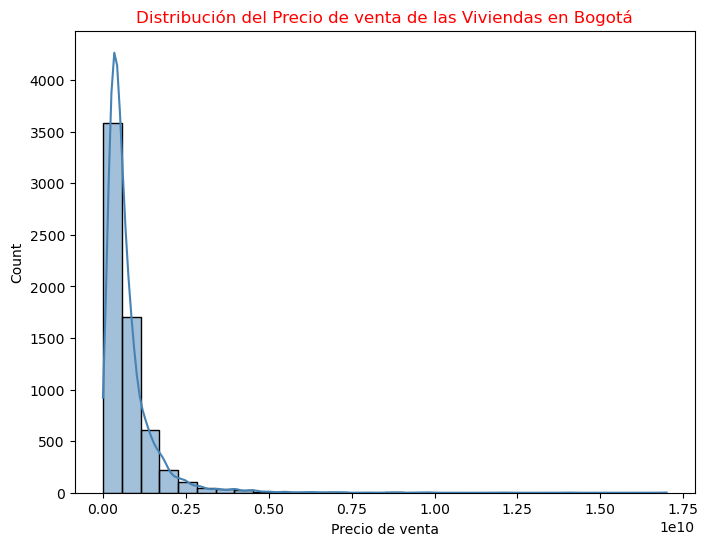

In [28]:
plt.figure(figsize=(8,6)) 
hist_precio=sns.histplot(x=data['precio_COP'],kde=True,color="steelblue", bins = 30) ## crea el boxplot
hist_precio.set_xlabel('Precio de venta') ## cambia el título del eje x
# hist_precio.set_xlim(0, 22)                     ## cambia los límites del eje x
# hist_precio.set_xticks(range(0,22,2))             ## cambia los valores del eje x
hist_precio.set_title('Distribución del Precio de venta de las Viviendas en Bogotá', color='r')
plt.show()

**Conclusión:** Analizando los datos suministrados por la tabla y apreciando las gráficas, se evidencia que  el centro de distribución está en 500.000.000 COP, con el 50% de los datos agrupados entre los 315.000.000 COP y 865.000.000 COP. Los datos presentan una dispersión alta con datos muy variables. Se aprecia una cantidad relativamente alta de datos atípicos. Finalmente, es posible afirmar que la distribución es relativamente asimétrica hacia la derecha y puntiaguda (alta concentración de datos en el centro y alta frecuencia de datos en sus extremos).

Visualicemos la relación de nuestras variables cualitativas vs el precio de venta de las viviendas.

¿Existe diferencia entre el precio_COP entre los distintos estratos?

In [30]:
data.groupby('estrato')['precio_COP'].describe()

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0,3.0,2.033333e+08,1.011599e+08,1.400000e+08,145000000.0,1.500000e+08,2.350000e+08,3.200000e+08
1,26.0,3.787800e+08,6.366431e+08,6.000000e+07,122585000.0,1.475000e+08,3.175000e+08,3.000000e+09
2,381.0,2.371333e+08,2.478370e+08,8.500000e+07,140000000.0,1.650000e+08,2.450000e+08,3.300000e+09
3,1431.0,3.390890e+08,2.270003e+08,1.080000e+08,200000000.0,2.700000e+08,3.800000e+08,2.500000e+09
4,1731.0,5.251330e+08,3.242005e+08,1.280000e+06,345000000.0,4.400000e+08,6.000000e+08,5.500000e+09
5,1148.0,7.754490e+08,5.213788e+08,2.451100e+00,470000000.0,6.500000e+08,9.400000e+08,7.950000e+09
6,1642.0,1.427412e+09,1.230747e+09,1.950000e+06,720000000.0,1.100000e+09,1.700000e+09,1.700000e+10


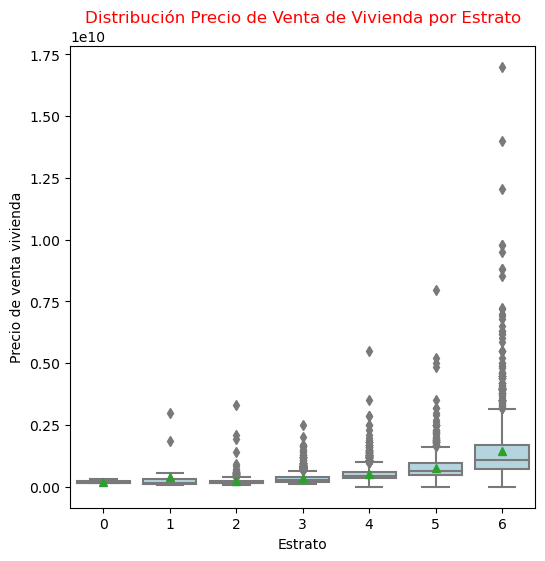

In [31]:
plt.figure(figsize=(6,6)) 
estrato_precio=sns.boxplot(x=data['estrato'],y=data['precio_COP'],color="lightblue",showmeans=True) ## crea el boxplot
estrato_precio.set_xlabel('Estrato') ## cambia el título del eje x
estrato_precio.set_ylabel('Precio de venta vivienda') ## cambia el título del eje y
estrato_precio.set_title('Distribución Precio de Venta de Vivienda por Estrato', color='r')
plt.show()  
                 

**Conclusion:** Analizando la muestra, podemos afirmar que el estrato de una vivienda en Bogotá está directamente relacionado con el precio de venta. Se evidencian los siguientes datos para las medias obtenidas en el precio de las viviendas:
- Estrato 6 = 1'427.412.000 COP
- Estrato 5 = 775.449.000 COP
- Estrato 4 = 525.133.000 COP
- Estrato 3 = 339.089.000 COP
- Estrato 1 = 378.780.000 COP
- Estrato 2 = 237.133.300 COP
- Estrato 0 = 203.333.330 COP

¿Existe diferencia del precio de venta de la casa según el estado de la misma?

In [32]:
data.groupby('estado')['precio_COP'].describe()

,count,mean,std,min,25%,50%,75%,max
estado,,,,,,,,
Remodelado,65.0,6.689523e+08,3.919525e+08,6.000000e+07,360000000.0,580000000.0,8.000000e+08,2.130000e+09
Bueno,1907.0,9.033140e+08,1.013539e+09,2.451100e+00,367000000.0,600000000.0,1.050000e+09,1.700000e+10
Excelente,1481.0,6.768581e+08,7.102237e+08,2.400000e+06,300000000.0,480000000.0,7.900000e+08,9.500000e+09
No definida,2909.0,6.739587e+08,7.158676e+08,7.511000e+00,288000000.0,465000000.0,8.000000e+08,1.400000e+10


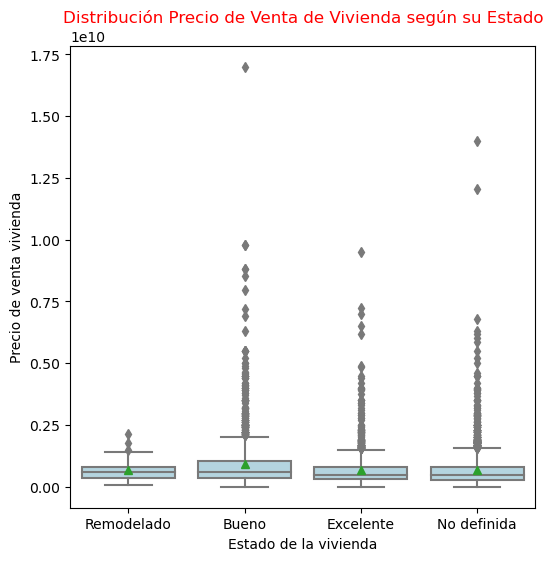

In [34]:
plt.figure(figsize=(6,6)) 
estrato_precio=sns.boxplot(x=data['estado'],y=data['precio_COP'],color="lightblue",showmeans=True) ## crea el boxplot
estrato_precio.set_xlabel('Estado de la vivienda') ## cambia el título del eje x
estrato_precio.set_ylabel('Precio de venta vivienda') ## cambia el título del eje y
estrato_precio.set_title('Distribución Precio de Venta de Vivienda según su Estado', color='r')
plt.show()  

**Conclusión:** De la muestra analizada se aprecia relación en el precio de venta de la vivienda según el estado en el cual se encuentre esta, apreciando que las viviendas que han sido remodeladas presentan una media de costo más baja en relación con los demás estados; las medias obtenidas según el estado de la vivienda son:
- Bueno: 903.314.000 COP
- Excelente: 676.858.100 COP
- No definida: 673.958.700 COP
- Remodelada: 668.952.300 COP

¿Existe diferencia del precio de venta de la casa según la antigüedad de la misma?

In [38]:
data.groupby('antiguedad')['precio_COP'].describe()

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
menor a 1 año,206.0,5.481843e+08,8.129313e+08,2.451100e+00,220000000.0,347962000.0,5.475000e+08,8.804000e+09
1 a 8 años,1264.0,6.919032e+08,7.941232e+08,1.950000e+06,290000000.0,465000000.0,7.662500e+08,8.800000e+09
9 a 15 años,1314.0,7.227021e+08,9.632776e+08,2.400000e+06,296500000.0,465500004.5,8.000000e+08,1.700000e+10
16 a 30 años,1964.0,7.853105e+08,8.344621e+08,1.280000e+06,315000000.0,520000000.0,9.377500e+08,9.800000e+09
más de 30 años,1271.0,8.430879e+08,7.030940e+08,7.511000e+00,420000000.0,670000000.0,1.018500e+09,9.800000e+09
No definida,343.0,5.190603e+08,4.961260e+08,8.600000e+07,191000000.0,365000000.0,6.300000e+08,3.950000e+09


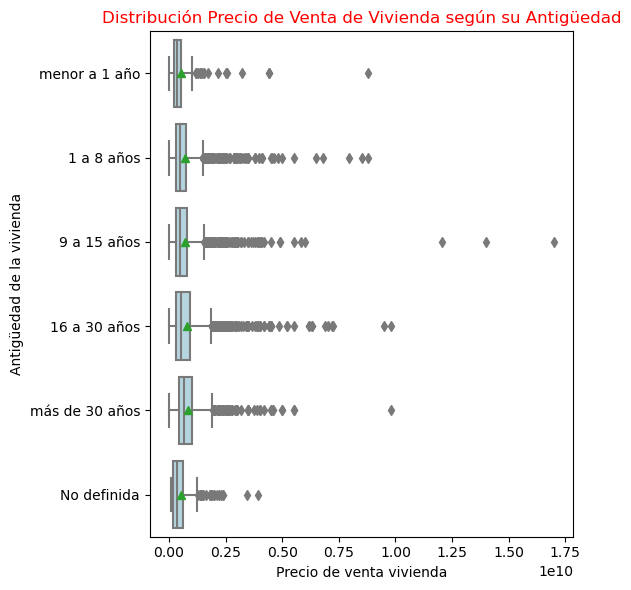

In [39]:
plt.figure(figsize=(6,6)) 
estrato_precio=sns.boxplot(y=data['antiguedad'],x=data['precio_COP'],color="lightblue",showmeans=True) ## crea el boxplot
estrato_precio.set_ylabel('Antigüedad de la vivienda') ## cambia el título del eje x
estrato_precio.set_xlabel('Precio de venta vivienda') ## cambia el título del eje y
estrato_precio.set_title('Distribución Precio de Venta de Vivienda según su Antigüedad',color='r')

plt.tight_layout()
plt.show()  

**Conclusión:** De la tabla obtenida y las gráficas de caja visualizadas, podemos afirmar que existe una relación directa entre la antigüedad de la vivienda y su precio de venta final. Sus medias obtenidas son:
- más de 30 años: 843.087.900 COP
- 16 a 30 años: 785.310.500 COP
- 9 a 15 años: 722.702.100 COP
- 1 a 8 años: 691.903.200 COP
- menos a 1 año: 548.184.300 COP
- No definida: 519.060.300 COP


¿Existe una relación entre el Tipo de vivienda y el precio de venta? 

In [40]:
data.groupby('Tipo_de_Vivienda')['precio_COP'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo_de_Vivienda,,,,,,,,
Apartamento,5072.0,6.935599e+08,7.331918e+08,2.4511,296750000.0,475000000.0,8.062500e+08,1.400000e+10
Casa,1290.0,9.390220e+08,1.073812e+09,7.5110,390000000.0,680000000.0,1.100000e+09,1.700000e+10


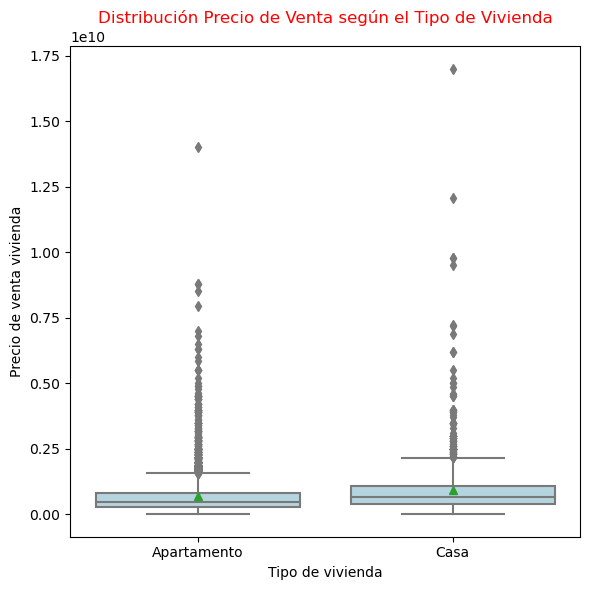

In [41]:
plt.figure(figsize=(6,6)) 
estrato_precio=sns.boxplot(x=data['Tipo_de_Vivienda'],y=data['precio_COP'],color="lightblue",showmeans=True) ## crea el boxplot
estrato_precio.set_xlabel('Tipo de vivienda') ## cambia el título del eje x
estrato_precio.set_ylabel('Precio de venta vivienda') ## cambia el título del eje y
estrato_precio.set_title('Distribución Precio de Venta según el Tipo de Vivienda', color='r')

plt.tight_layout()
plt.show()  

**Conclusión:** En la muestra analizada, el tipo de vivienda casa en promedio tiene un mejor precio de venta que los apartamentos (media 939.022.000 COP vs 693.559.900 COP, respectivamente).

Procedamos a visualizar las variables de forma general, que presentan dos opciones (Si o No), si están relacionadas con el precio de venta de las viviendas, se tiene:

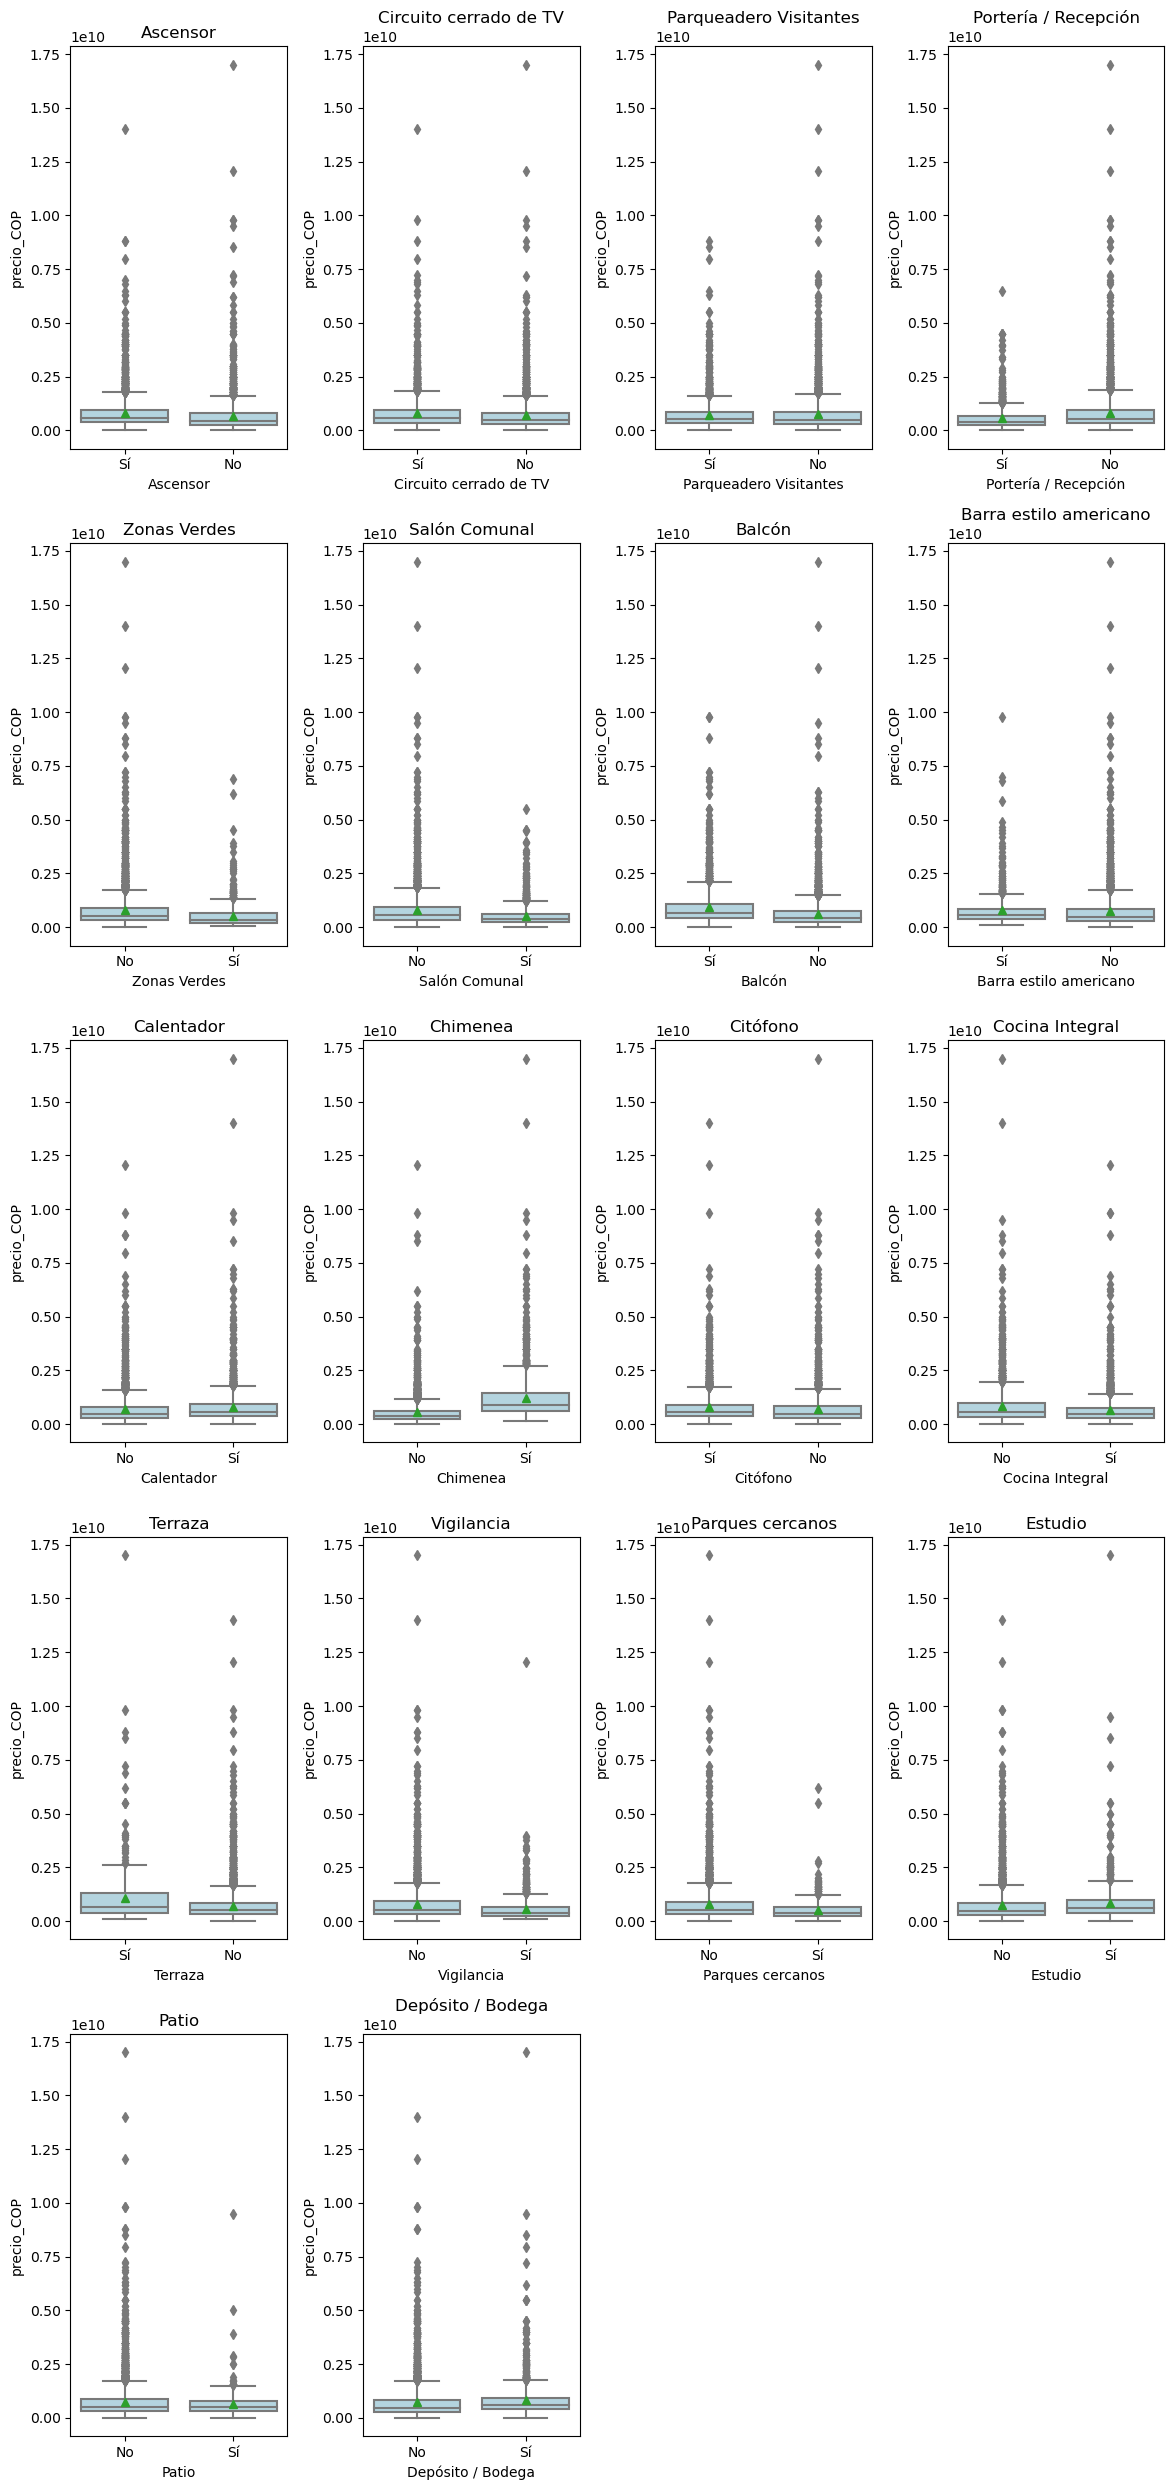

In [42]:
columnas = data.columns[10:28] # columnas de nuestro interés
num_subplots = len(columnas) # subplots requeridos

# Calcula el número de filas y columnas para los subplots
num_filas = (num_subplots + 3) // 4 # se garantiza almenos 1 fila
num_columnas = min(4, num_subplots) 

# Creemos la figura y los ejes de los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, num_filas * 5)) # tamaño requerido

# Asegura que axes sea una matriz bidimensional, incluso si hay solo una fila
if num_filas == 1:
    axes = [axes]

# Itera sobre las columnas y grafica un diagrama de caja para cada una
for i, columna in enumerate(columnas):
    # Calcula las coordenadas del subplot actual
    fila = i // num_columnas
    columna_subplot = i % num_columnas
    
    # Grafica el diagrama de caja en el subplot actual
    sns.boxplot(data=data, x=columna, y=data['precio_COP'], ax=axes[fila][columna_subplot], color="lightblue", showmeans= True)
    axes[fila][columna_subplot].set_title(columna) # titulo del subplot
    
# Ajustar espacios
plt.tight_layout()

# Iteramos y ocultamos los subplots no utilizados de nuestras columnas
for i in range(num_subplots, num_filas * num_columnas):
    fila = i // num_columnas
    columna = i % num_columnas
    axes[fila][columna].axis('off')

plt.show()

**Conclusión:** De manera gráfica podemos visualizar y tener un conocimiento general de la relación que existen entre las columnas graficadas (categóricas: Sí y No) y el precio de venta de las viviendas.

### 4) Preprocesamiento de Datos
En esta instancia aplicaremos técnicas de detección de anomalías e ingeniería de características:

#### 1) Detección de anomalías:

El objetivo principal de esta sección va a ser la eliminación de valores atípicos de nuestras variables cuantitativas, lo cual repercutirá positivamente en la precisión de nuestro modelo ML.

Análicemos de manera gráfica nuestras variables predictoras cuantitativas:

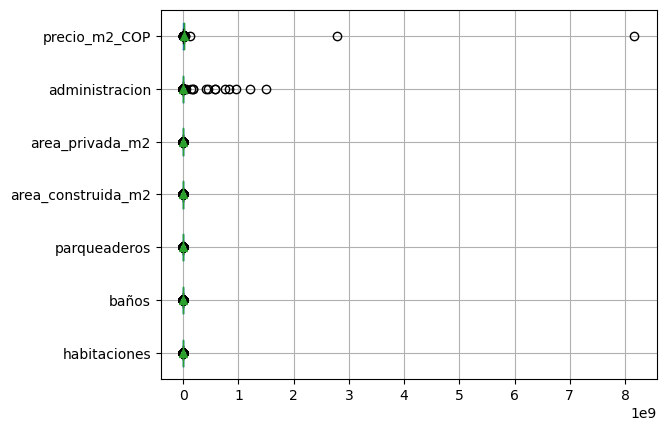

In [43]:
pred_cuanti = ['habitaciones','baños','parqueaderos','area_construida_m2','area_privada_m2',
               'administracion','precio_m2_COP']
data.boxplot(column=pred_cuanti, vert=False, showmeans= True)
plt.show()

In [44]:
tabla_pred= data[pred_cuanti].describe()
tabla_pred

,habitaciones,baños,parqueaderos,area_construida_m2,area_privada_m2,administracion,precio_m2_COP
count,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,4.987000e+03,6.362000e+03
mean,3.042125,2.693493,1.518862,165.783051,127.071489,2.124797e+06,7.200986e+06
std,1.379705,1.245543,1.177278,1842.792846,1751.994731,3.723202e+07,1.081315e+08
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000e+00,3.444440e+03
25%,2.000000,2.000000,1.000000,65.000000,35.000000,2.230000e+05,4.035088e+06
50%,3.000000,2.000000,1.000000,96.000000,74.000000,4.090000e+05,5.156250e+06
75%,3.000000,3.000000,2.000000,168.000000,136.000000,7.545000e+05,6.559785e+06
max,16.000000,10.000000,10.000000,139000.000000,139000.000000,1.490000e+09,8.166667e+09


De las gráficas visualizadas, procedamos a calcular el rango intercuartílico (IQR) y determinemos qué valores se considerarían atípicos utilizando la técnica basada en los cuartiles (IQR). Para obtener su límite superior, tenemos la siguiente función:

In [45]:
# funcion para calcular límites intercuartilicos
def calcular_limites(Q1, Q3):
    IQR = Q3 - Q1
    lim_sup = Q3 + 1.5 * IQR
    return lim_sup

In [46]:
limites_sup = {} # diccionario para guardar los límites calculados
# Iteramos la tabla y calcula los límites intercuartílicos para cada columna
for col in tabla_pred:
    Q1 = tabla_pred[col]['25%']
    Q3 = tabla_pred[col]['75%']
    lim_sup = calcular_limites(Q1, Q3)
    limites_sup[col] = lim_sup
    print(f"Límite superior para '{col}': {lim_sup}")

Límite superior para 'habitaciones': 4.5
Límite superior para 'baños': 4.5
Límite superior para 'parqueaderos': 3.5
Límite superior para 'area_construida_m2': 322.5
Límite superior para 'area_privada_m2': 287.5
Límite superior para 'administracion': 1551750.0
Límite superior para 'precio_m2_COP': 10346830.7825


In [47]:
limites_sup

{'habitaciones': 4.5,
 'baños': 4.5,
 'parqueaderos': 3.5,
 'area_construida_m2': 322.5,
 'area_privada_m2': 287.5,
 'administracion': 1551750.0,
 'precio_m2_COP': 10346830.7825}

Procedamos a eliminar los datos atípicos de nuestra data; de forma dinamica, tenemos:

In [48]:
print(f'Antes de eliminar datos atípicos: {len(data)}')
# Iteremos sobre cada columna del diccionario de límites superiores que obtuvimos
for col, lim_sup in limites_sup.items():
    # Filtramos los datos que cumplen la condición(eliminación de datos atípicos)
    data = data[data[col] <= lim_sup]
print(f'Después de filtrar la data: {len(data)}')
data

Antes de eliminar datos atípicos: 6362
Después de filtrar la data: 4245


,habitaciones,baños,parqueaderos,area_construida_m2,area_privada_m2,estrato,estado,antiguedad,administracion,precio_m2_COP,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,Tipo_de_Vivienda,ubicacion,precio_COP
0,2.0,2.0,1.0,92.0,92.0,4,No definida,9 a 15 años,622000.0,6521739.13,...,No,Sí,No,No,No,No,No,Apartamento,Centro Internacional,600000000.0
1,1.0,2.0,1.0,56.0,56.0,6,No definida,1 a 8 años,523000.0,8392857.14,...,No,Sí,No,No,No,No,No,Apartamento,Calleja Baja,470000000.0
2,3.0,4.0,2.0,144.0,144.0,6,No definida,16 a 30 años,620000.0,6597222.22,...,No,No,No,No,No,No,No,Apartamento,Cerros de Suba,950000000.0
3,1.0,1.0,0.0,31.0,31.0,4,Excelente,menor a 1 año,130000.0,7419354.84,...,No,No,No,No,No,No,No,Apartamento,Mazuren,230000000.0
4,3.0,2.0,1.0,52.0,52.0,4,No definida,1 a 8 años,219000.0,5576923.08,...,No,No,No,No,No,No,No,Apartamento,El plan,290000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,3.0,4.0,2.0,158.0,157.0,6,No definida,16 a 30 años,800000.0,4430379.75,...,No,No,No,No,No,No,No,Apartamento,Santa Barbara central,700000000.0
8417,3.0,2.0,1.0,88.0,84.0,4,No definida,1 a 8 años,290000.0,4488636.36,...,Sí,No,Sí,No,No,No,No,Apartamento,Pinar de Suba,395000000.0
8419,1.0,1.0,0.0,45.0,45.0,4,No definida,16 a 30 años,329000.0,4244444.44,...,Sí,No,No,No,No,No,No,Apartamento,LA VICTORIA NORTE,191000000.0
8425,4.0,4.0,2.0,170.0,0.0,4,No definida,más de 30 años,500000.0,4029411.76,...,Sí,No,No,No,No,No,No,Casa,Cedritos,685000000.0


Análicemos la correlación de los datos vs el precio de venta (precio_COP), tenemos: 

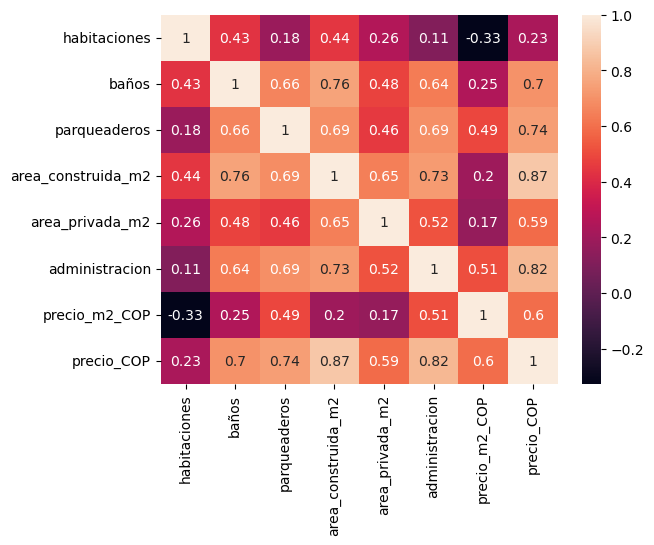

In [50]:
# Obsevemos la correlación luego de eliminar datos atipicos
sns.heatmap(data.select_dtypes(include = 'number').corr(), annot = True)
plt.show()

**Conclusión:** La eliminación de datos atípicos mejoró la correlación de nuestras variables en relación con el precio. Es correcto afirmar que la correlación que existe entre nuestras variables es:
- habitaciones vs precio_COP: **Correlación positiva débil**
- baños vs precio_COP: **Correlación positiva moderada-fuerte**
- parqueaderos vs precio_COP: **Correlación positiva moderada-fuerte**
- area_construida_m2 vs precio_COP: **Correlación positiva fuerte**
- area_privada_m2 vs precio_COP: **Correlación positiva moderada**
- administracion vs precio_COP: **Correlación positiva fuerte**
- precio_m2_COP vs precio_COP: **Correlación positiva moderada**

#### 2) Ingeniería de Características:
El objetivo principal de esta sección es seleccionar y transformar las variables para la creación del modelo predictivo. Esto se debe a que muchos algoritmos de ML requieren que su entrada sea numérica. Se tiene:

In [51]:
data_train = data.copy()
data_train

,habitaciones,baños,parqueaderos,area_construida_m2,area_privada_m2,estrato,estado,antiguedad,administracion,precio_m2_COP,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,Tipo_de_Vivienda,ubicacion,precio_COP
0,2.0,2.0,1.0,92.0,92.0,4,No definida,9 a 15 años,622000.0,6521739.13,...,No,Sí,No,No,No,No,No,Apartamento,Centro Internacional,600000000.0
1,1.0,2.0,1.0,56.0,56.0,6,No definida,1 a 8 años,523000.0,8392857.14,...,No,Sí,No,No,No,No,No,Apartamento,Calleja Baja,470000000.0
2,3.0,4.0,2.0,144.0,144.0,6,No definida,16 a 30 años,620000.0,6597222.22,...,No,No,No,No,No,No,No,Apartamento,Cerros de Suba,950000000.0
3,1.0,1.0,0.0,31.0,31.0,4,Excelente,menor a 1 año,130000.0,7419354.84,...,No,No,No,No,No,No,No,Apartamento,Mazuren,230000000.0
4,3.0,2.0,1.0,52.0,52.0,4,No definida,1 a 8 años,219000.0,5576923.08,...,No,No,No,No,No,No,No,Apartamento,El plan,290000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,3.0,4.0,2.0,158.0,157.0,6,No definida,16 a 30 años,800000.0,4430379.75,...,No,No,No,No,No,No,No,Apartamento,Santa Barbara central,700000000.0
8417,3.0,2.0,1.0,88.0,84.0,4,No definida,1 a 8 años,290000.0,4488636.36,...,Sí,No,Sí,No,No,No,No,Apartamento,Pinar de Suba,395000000.0
8419,1.0,1.0,0.0,45.0,45.0,4,No definida,16 a 30 años,329000.0,4244444.44,...,Sí,No,No,No,No,No,No,Apartamento,LA VICTORIA NORTE,191000000.0
8425,4.0,4.0,2.0,170.0,0.0,4,No definida,más de 30 años,500000.0,4029411.76,...,Sí,No,No,No,No,No,No,Casa,Cedritos,685000000.0


In [52]:
# Codificamos las columnas categóricas mencionadas anteriormente:

codificador = LabelEncoder() #inicializamos el LabelEncoder

# variable ubicacion
data_train['ubicacion'] = codificador.fit_transform(data_train['ubicacion'])
# debido a la alta cantidad de nulos, tratemos administracion como categorica por RL
# data_train['administracion'] = codificador.fit_transform(data_train['administracion'])

# variables con pocas categorias, las emplearemos con get_dummies
variables_dummies = ['Ascensor', 'Circuito cerrado de TV', 'Parqueadero Visitantes',
       'Portería / Recepción', 'Zonas Verdes', 'Salón Comunal', 'Balcón',
       'Barra estilo americano', 'Calentador', 'Chimenea', 'Citófono',
       'Cocina Integral', 'Terraza', 'Vigilancia', 'Parques cercanos',
       'Estudio', 'Patio', 'Depósito / Bodega', 'Tipo_de_Vivienda','estrato','antiguedad', 'estado']
data_dummies = pd.get_dummies(data_train[variables_dummies])
data_train = pd.concat([data_train, data_dummies], axis = 1)


In [53]:
data_train

,habitaciones,baños,parqueaderos,area_construida_m2,area_privada_m2,estrato,estado,antiguedad,administracion,precio_m2_COP,...,antiguedad_menor a 1 año,antiguedad_1 a 8 años,antiguedad_9 a 15 años,antiguedad_16 a 30 años,antiguedad_más de 30 años,antiguedad_No definida,estado_Remodelado,estado_Bueno,estado_Excelente,estado_No definida
0,2.0,2.0,1.0,92.0,92.0,4,No definida,9 a 15 años,622000.0,6521739.13,...,False,False,True,False,False,False,False,False,False,True
1,1.0,2.0,1.0,56.0,56.0,6,No definida,1 a 8 años,523000.0,8392857.14,...,False,True,False,False,False,False,False,False,False,True
2,3.0,4.0,2.0,144.0,144.0,6,No definida,16 a 30 años,620000.0,6597222.22,...,False,False,False,True,False,False,False,False,False,True
3,1.0,1.0,0.0,31.0,31.0,4,Excelente,menor a 1 año,130000.0,7419354.84,...,True,False,False,False,False,False,False,False,True,False
4,3.0,2.0,1.0,52.0,52.0,4,No definida,1 a 8 años,219000.0,5576923.08,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,3.0,4.0,2.0,158.0,157.0,6,No definida,16 a 30 años,800000.0,4430379.75,...,False,False,False,True,False,False,False,False,False,True
8417,3.0,2.0,1.0,88.0,84.0,4,No definida,1 a 8 años,290000.0,4488636.36,...,False,True,False,False,False,False,False,False,False,True
8419,1.0,1.0,0.0,45.0,45.0,4,No definida,16 a 30 años,329000.0,4244444.44,...,False,False,False,True,False,False,False,False,False,True
8425,4.0,4.0,2.0,170.0,0.0,4,No definida,más de 30 años,500000.0,4029411.76,...,False,False,False,False,True,False,False,False,False,True


### Modelo de Machine Learning

El propósito de esta sección es crear un modelo para predecir el precio de una vivienda ubicada en Bogotá. Emplearemos un algoritmo de regresión lineal, el cual es un método básico de análisis predictivo. Hay dos tipos de variables en los modelos de regresión lineal:
1) La variable de entrada o predictora es la variable o variables que ayudan a predecir el valor de la variable de salida. Generalmente se le llama X.
2) La variable de salida es la variable que queremos predecir. Generalmente se le llama Y.

Determinemos las variables predictoras:

In [54]:
data_train.columns

Index(['habitaciones', 'baños', 'parqueaderos', 'area_construida_m2',
       'area_privada_m2', 'estrato', 'estado', 'antiguedad', 'administracion',
       'precio_m2_COP', 'Ascensor', 'Circuito cerrado de TV',
       'Parqueadero Visitantes', 'Portería / Recepción', 'Zonas Verdes',
       'Salón Comunal', 'Balcón', 'Barra estilo americano', 'Calentador',
       'Chimenea', 'Citófono', 'Cocina Integral', 'Terraza', 'Vigilancia',
       'Parques cercanos', 'Estudio', 'Patio', 'Depósito / Bodega',
       'Tipo_de_Vivienda', 'ubicacion', 'precio_COP', 'Ascensor_No',
       'Ascensor_Sí', 'Circuito cerrado de TV_No', 'Circuito cerrado de TV_Sí',
       'Parqueadero Visitantes_No', 'Parqueadero Visitantes_Sí',
       'Portería / Recepción_No', 'Portería / Recepción_Sí', 'Zonas Verdes_No',
       'Zonas Verdes_Sí', 'Salón Comunal_No', 'Salón Comunal_Sí', 'Balcón_No',
       'Balcón_Sí', 'Barra estilo americano_No', 'Barra estilo americano_Sí',
       'Calentador_No', 'Calentador_Sí', 'Chimen

In [55]:
# dividimos la data, los atributos de la variable a predecir
X = data_train[['habitaciones', 'baños', 'parqueaderos', 'area_construida_m2','area_privada_m2','administracion','precio_m2_COP',
          'ubicacion', 'Ascensor_No','Ascensor_Sí', 'Circuito cerrado de TV_No', 'Circuito cerrado de TV_Sí',
          'Parqueadero Visitantes_No', 'Parqueadero Visitantes_Sí','Portería / Recepción_No', 'Portería / Recepción_Sí',
          'Zonas Verdes_No','Zonas Verdes_Sí', 'Salón Comunal_No', 'Salón Comunal_Sí', 'Balcón_No','Balcón_Sí',
          'Barra estilo americano_No', 'Barra estilo americano_Sí','Calentador_No', 'Calentador_Sí', 'Chimenea_No',
          'Chimenea_Sí','Citófono_No', 'Citófono_Sí', 'Cocina Integral_No','Cocina Integral_Sí', 'Terraza_No', 'Terraza_Sí',
          'Vigilancia_No','Vigilancia_Sí', 'Parques cercanos_No', 'Parques cercanos_Sí','Estudio_No', 'Estudio_Sí', 'Patio_No',
          'Patio_Sí','Depósito / Bodega_No', 'Depósito / Bodega_Sí','Tipo_de_Vivienda_Apartamento', 'Tipo_de_Vivienda_Casa',
          'estrato_0','estrato_1', 'estrato_2', 'estrato_3', 'estrato_4', 'estrato_5','estrato_6', 'antiguedad_menor a 1 año',
          'antiguedad_1 a 8 años','antiguedad_9 a 15 años', 'antiguedad_16 a 30 años','antiguedad_más de 30 años',
          'antiguedad_No definida','estado_Remodelado', 'estado_Bueno', 'estado_Excelente','estado_No definida']]
y = data_train['precio_COP']

In [56]:
# VARIABLES PREDICTORAS
X

,habitaciones,baños,parqueaderos,area_construida_m2,area_privada_m2,administracion,precio_m2_COP,ubicacion,Ascensor_No,Ascensor_Sí,...,antiguedad_menor a 1 año,antiguedad_1 a 8 años,antiguedad_9 a 15 años,antiguedad_16 a 30 años,antiguedad_más de 30 años,antiguedad_No definida,estado_Remodelado,estado_Bueno,estado_Excelente,estado_No definida
0,2.0,2.0,1.0,92.0,92.0,622000.0,6521739.13,129,False,True,...,False,False,True,False,False,False,False,False,False,True
1,1.0,2.0,1.0,56.0,56.0,523000.0,8392857.14,94,False,True,...,False,True,False,False,False,False,False,False,False,True
2,3.0,4.0,2.0,144.0,144.0,620000.0,6597222.22,135,False,True,...,False,False,False,True,False,False,False,False,False,True
3,1.0,1.0,0.0,31.0,31.0,130000.0,7419354.84,415,False,True,...,True,False,False,False,False,False,False,False,True,False
4,3.0,2.0,1.0,52.0,52.0,219000.0,5576923.08,243,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,3.0,4.0,2.0,158.0,157.0,800000.0,4430379.75,595,True,False,...,False,False,False,True,False,False,False,False,False,True
8417,3.0,2.0,1.0,88.0,84.0,290000.0,4488636.36,487,False,True,...,False,True,False,False,False,False,False,False,False,True
8419,1.0,1.0,0.0,45.0,45.0,329000.0,4244444.44,315,True,False,...,False,False,False,True,False,False,False,False,False,True
8425,4.0,4.0,2.0,170.0,0.0,500000.0,4029411.76,116,True,False,...,False,False,False,False,True,False,False,False,False,True


In [57]:
# datos a predecir de precio 
y

0       600000000.0
1       470000000.0
2       950000000.0
3       230000000.0
4       290000000.0
           ...     
8414    700000000.0
8417    395000000.0
8419    191000000.0
8425    685000000.0
8426    123000000.0
Name: precio_COP, Length: 4245, dtype: float64

In [58]:
# Dividimos el 80% de los datos para entrenamiento y el 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [59]:
# Imputamos los datos nulos de nuestra data
from sklearn.impute import SimpleImputer
# imputamos los datos NaN con la mediana para evitar inducir un sesgo mayor
imputer = SimpleImputer(strategy='median') 
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

Conociendo que los modelos de bosques aleatorios son robustos, versátiles y manejan datos faltantes de manera óptima, además de proporcionar buenos resultados cuando se tienen una alta variedad en los conjuntos de datos, emplearemos este modelo:

In [60]:
# Modelo RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
# entrenamos el modelo
rf_regressor.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=1)

Ahora, procedemos a utilizar los datos de prueba para comprobar la precisión de nuestro algoritmo para predecir el precio de la vivienda (precio_COP):

In [61]:
rf_predictions = rf_regressor.predict(X_test_imputed)

In [64]:
result = {'Real':y_test, 'Predicción':rf_predictions}

result = pd.DataFrame(result)
result = result.head(10)

result

,Real,Predicción
2883,415400000.0,416600000.0
413,155000000.0,154545400.0
5957,237000000.0,237180000.0
5098,870000000.0,866839000.0
4171,330000000.0,335406860.0
153,550000000.0,542710000.0
6826,340000000.0,337910860.0
1941,550000000.0,545340000.0
5137,254000000.0,258088000.0
2904,720000000.0,714460000.0


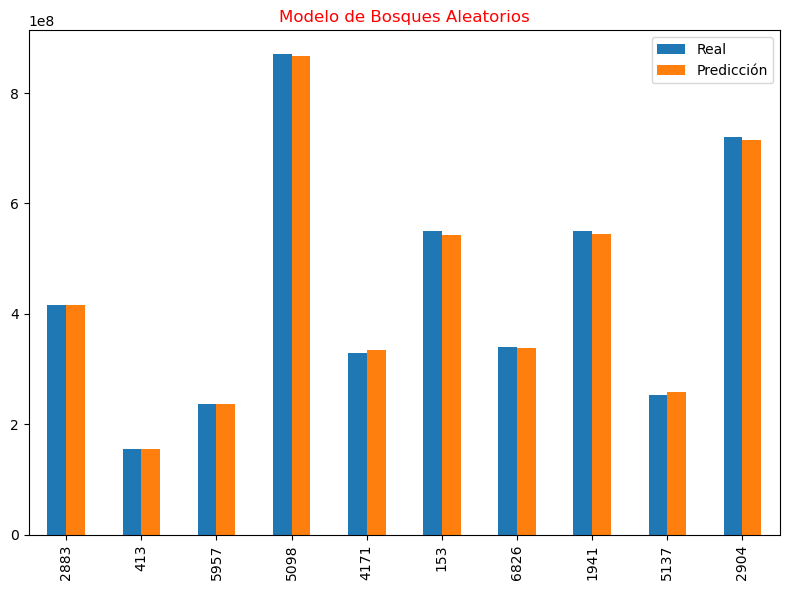

In [65]:
result.plot(kind='bar', figsize=(8, 6))
plt.title('Modelo de Bosques Aleatorios', color='r')
plt.tight_layout()
plt.show()

Apreciamos que el modelo tiene una precisión moderada, sus valores se aproximan a los reales; evaluemos el modelo.

In [66]:
# Error absoluto medio de nuestro modelo 
rf_mae = metrics.mean_absolute_error(y_test, rf_predictions)
print("Random Forest MAE:", rf_mae.round(2))

#Coeficiente de determinación R2
r2 = metrics.r2_score(y_test, rf_predictions)
print(f'El valor de R2 es: {r2}')



Random Forest MAE: 10022148.62
El valor de R2 es: 0.993934201159522


**Conclusión:** El valor absoluto medio indica que, en promedio, las predicciones de nuestro modelo están desviadas en 10'022.148 COP. Del valor R2 se aprecia una precisión de aproximadamente el 99%.